In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.sparse import data
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA
from sklearn.metrics.pairwise import cosine_similarity

In [2]:
dt = pd.read_csv('Land mines.csv')
dt.head()

,voltage,high,soil_type,mine_type
0,0.338157,0.000000,1,1
1,0.320241,0.181818,1,1
2,0.287009,0.272727,1,1
3,0.256284,0.454545,1,1
4,0.262840,0.545455,1,1


In [3]:
data = dt.drop(['mine_type'], axis=1)
data.head()

,voltage,high,soil_type
0,0.338157,0.000000,1
1,0.320241,0.181818,1
2,0.287009,0.272727,1
3,0.256284,0.454545,1
4,0.262840,0.545455,1


In [4]:
missingdata = data.isnull().sum()
missingdata

voltage      0
high         0
soil_type    0
dtype: int64

In [5]:
print(data[data.duplicated(keep=False)])

Empty DataFrame
Columns: [voltage, high, soil_type]
Index: []


In [6]:
scaler = StandardScaler()
datascale = scaler.fit_transform(data)

scaleddata = pd.DataFrame(datascale, columns = data.columns)
scaleddata.head()

,voltage,high,soil_type
0,-0.472960,-1.665222,-1.464942
1,-0.564586,-1.070248,-1.464942
2,-0.734548,-0.772762,-1.464942
3,-0.891686,-0.177788,-1.464942
4,-0.858157,0.119699,-1.464942


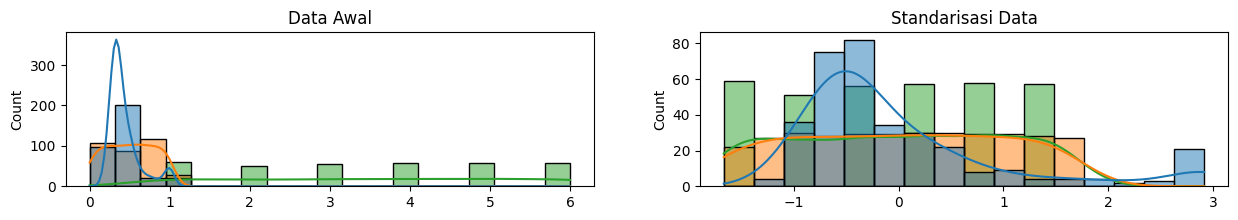

In [7]:
fig, ax = plt.subplots(1, 2, figsize=(15, 2))
sns.histplot(data, ax=ax[0], kde=True, legend=False)
ax[0].set_title("Data Awal")
sns.histplot(scaleddata, ax=ax[1], kde=True, legend=False)
ax[1].set_title("Standarisasi Data")
plt.show()

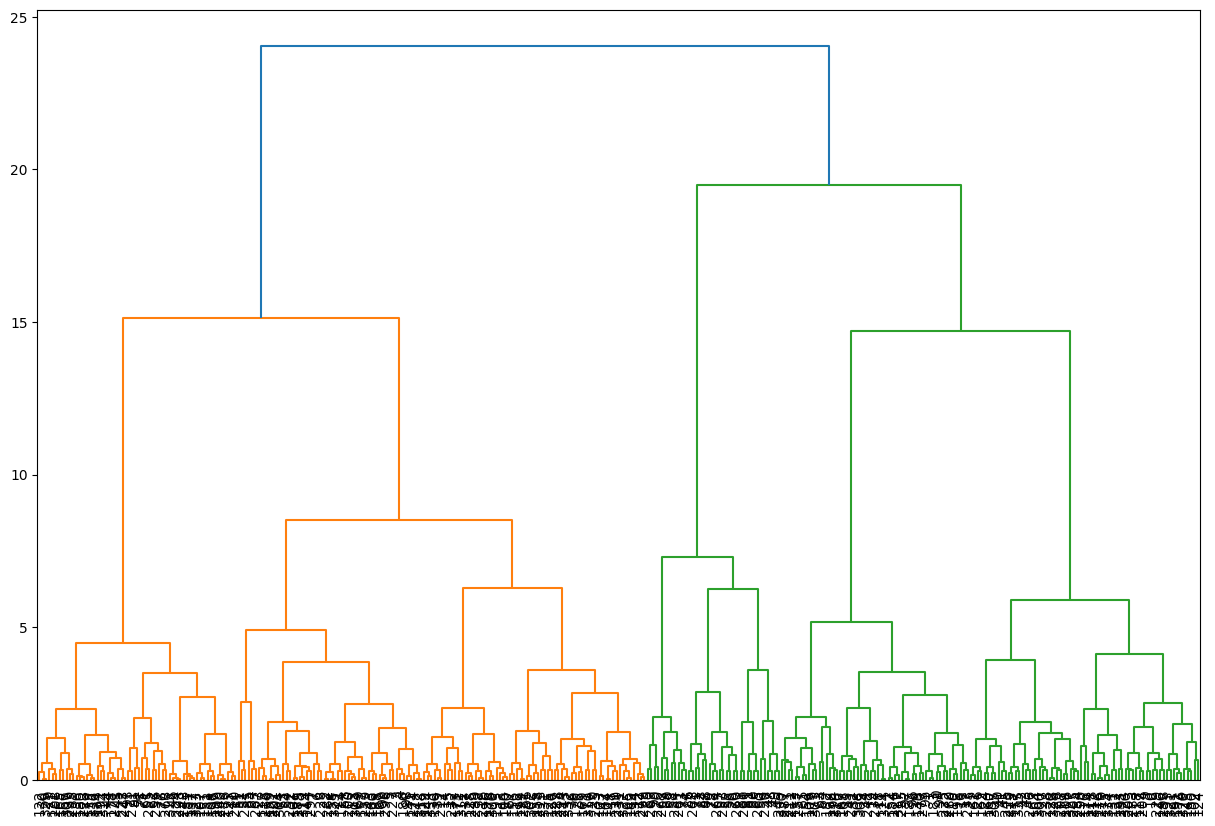

In [8]:
plt.figure(figsize=(15, 10))
dendrogram(linkage(scaleddata, method='ward', metric="euclidean")
           , leaf_rotation=90, p=5, color_threshold=20, leaf_font_size=10)
plt.show()

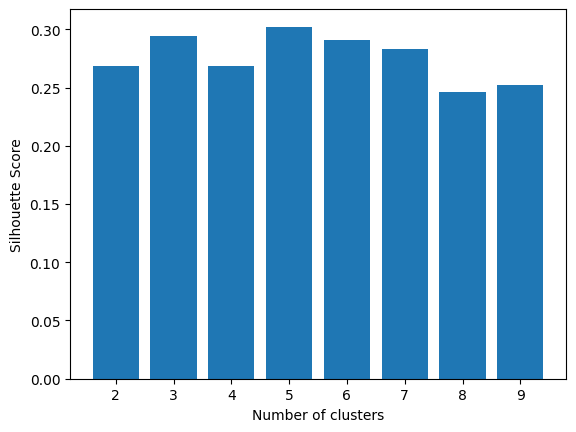

In [9]:
silhouette_scores = []

for n_cluster in range(2, 10):
  silhouette_scores.append(
      silhouette_score(scaleddata, AgglomerativeClustering(n_clusters = n_cluster).fit_predict(scaleddata)))

plt.bar(range(2, 10), silhouette_scores)
plt.xlabel('Number of clusters', fontsize = 10)
plt.ylabel('Silhouette Score', fontsize = 10)
plt.show()

In [10]:
agglo = AgglomerativeClustering(n_clusters=2)
agglo.fit(scaleddata)
labels = agglo.labels_
hasil_agglo = pd.concat([scaleddata, pd.DataFrame({'cluster':labels})], axis=1)
hasil_agglo.head()

,voltage,high,soil_type,cluster
0,-0.472960,-1.665222,-1.464942,0
1,-0.564586,-1.070248,-1.464942,0
2,-0.734548,-0.772762,-1.464942,0
3,-0.891686,-0.177788,-1.464942,1
4,-0.858157,0.119699,-1.464942,1


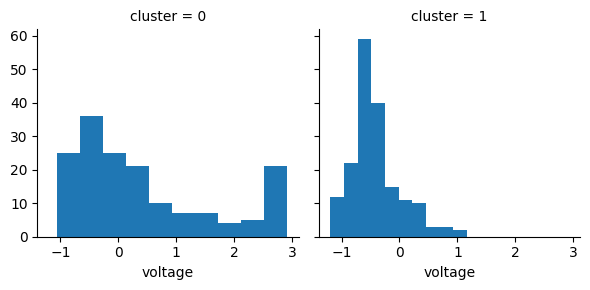

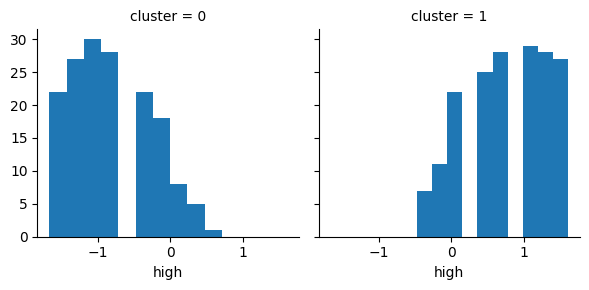

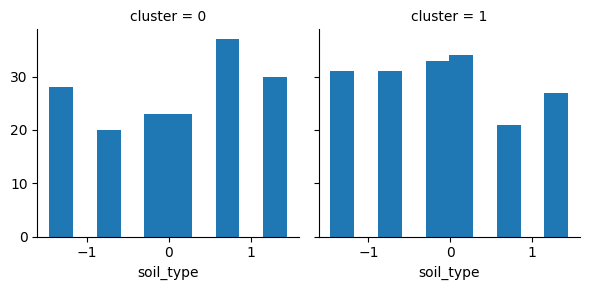

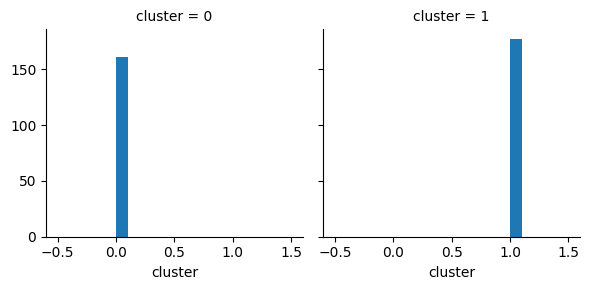

In [11]:
for i in hasil_agglo:
  grid = sns.FacetGrid(hasil_agglo, col='cluster')
  grid.map(plt.hist, i)

In [12]:
dist = 1 - cosine_similarity(scaleddata)

pca = PCA(n_components = 5)
pca = pca.fit_transform(dist)

In [13]:
x, y = pca[:, 0], pca[:, 1]

warna = {0: 'red',
         1: 'blue'}
label_pca = {0: 'cluster 0',
             1: 'cluster 1'}
scaleddata = pd.DataFrame({'x': x, 'y': y, 'label':labels})
groups = scaleddata.groupby('label')

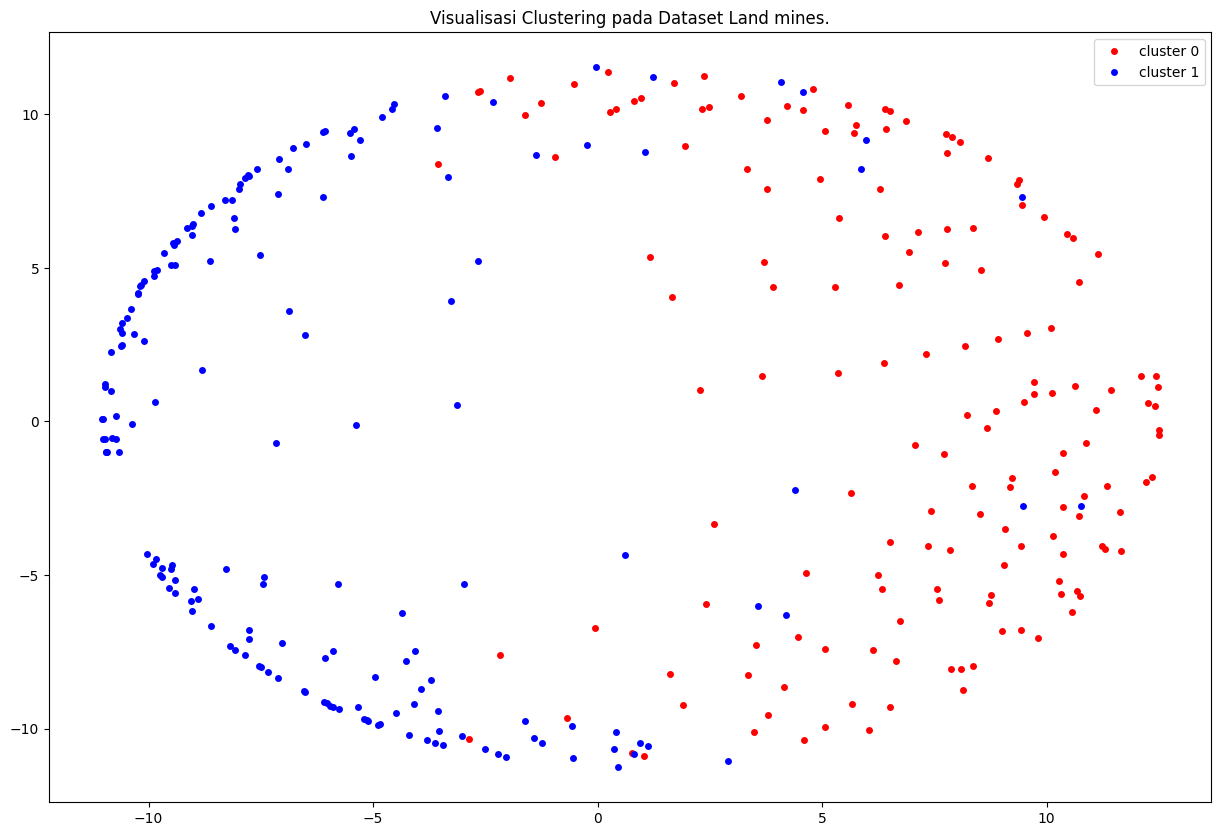

In [14]:
fig, ax = plt.subplots(figsize=(15, 10))

for name, group in groups:
  ax.plot(group.x, group.y, marker='o', linestyle='', ms=5,
          color=warna[name], label=label_pca[name], mec='none')
  ax.set_aspect('auto')
  ax.tick_params(axis='x', which='both', bottom='off', labelbottom='off')
  ax.tick_params(axis='y', which='both', left='off', labelleft='off')

ax.legend()
ax.set_title('Visualisasi Clustering pada Dataset Land mines.')
plt.show()